# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
import pandas as pd
import numpy as np
import sqlalchemy

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
conn_string = 'mysql+pymysql://root:&FK^[8jLK$"/4=n*@34.65.10.136:3306/employees'
conn = sqlalchemy.create_engine(conn_string)
employees = pd.read_sql_query('SELECT * FROM employees;', conn)
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
employees.groupby('Department').mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [4]:
# Method 2 - Pivot Table
employees.pivot_table(index=["Department"])

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
employees.pivot_table(index=["Title","Department"], values=["Salary"])

Salary
Title     Department        
VP        HR            70.0
          IT            70.0
analyst   HR            32.5
          IT            32.5
associate IT            60.0
          Sales         55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
employees.pivot_table(index=["Title"], values=["Years","Salary"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [16]:
employees.pivot_table(index=["Title","Department"], aggfunc={"Department":'count',"Salary":"mean"})

Department  Salary
Title     Department                    
VP        HR                   1    70.0
          IT                   1    70.0
analyst   HR                   2    32.5
          IT                   2    32.5
associate IT                   1    60.0
          Sales                2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [13]:
employees.pivot_table(index=["Title","Department"], aggfunc={"Salary":[min, max, np.std, np.median]})

Salary                       
                        max median   min       std
Title     Department                              
VP        HR           70.0   70.0  70.0       NaN
          IT           70.0   70.0  70.0       NaN
analyst   HR           35.0   32.5  30.0  3.535534
          IT           35.0   32.5  30.0  3.535534
associate IT           60.0   60.0  60.0       NaN
          Sales        55.0   55.0  55.0  0.000000

As the company has not many employees, some of the titles for departments only have a single employee. For this reason, these values do not have much to say. The analyst job title have two employees per department so we can see the difference between salaries. Sales Associates both have the same salary conditions.

#### Based on your comments, fill the missing values with an appropriate value.

In [17]:
employees.pivot_table(index=["Title","Department"], aggfunc={"Salary":[min, max, np.std, np.median]},fill_value=0)

Salary                     
                        max median min       std
Title     Department                            
VP        HR             70   70.0  70  0.000000
          IT             70   70.0  70  0.000000
analyst   HR             35   32.5  30  3.535534
          IT             35   32.5  30  3.535534
associate IT             60   60.0  60  0.000000
          Sales          55   55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [19]:
employees.pivot_table(index=["Department"], aggfunc={"Department":'count',"Salary":"sum"})

,Department,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [21]:
employees.pivot_table(index=["Department","Title"], aggfunc={"Years":'sum',"Salary":"mean"})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [22]:
conn_string = 'mysql+pymysql://root:&FK^[8jLK$"/4=n*@34.65.10.136:3306/fitbit'
conn = sqlalchemy.create_engine(conn_string)
fitbit = pd.read_sql_query('SELECT * FROM fitbit;', conn)
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417\r
1,09-05-2015,3631,18925,14.11,4,611.0,316,61,60,2248,454,35,21,491\r
2,10-05-2015,3204,14228,10.57,1,602.0,226,14,77,1719,387,46,25,436\r
3,11-05-2015,2673,6756,5.02,8,749.0,190,23,4,9620,311,31,21,350\r
4,12-05-2015,2495,502,3.73,1,876.0,171,0,0,7360,407,65,44,491\r


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [48]:
fitbit.dtypes

Date                      object
Calorie burned             int64
Steps                      int64
Distance                  object
Floors                     int64
Minutes Sedentary         object
Minutes Lightly Active     int64
Minutes Fairly Active      int64
Minutes Very Active        int64
Activity Calories          int64
MinutesOfSleep             int64
MinutesOfBeingAwake        int64
NumberOfAwakings           int64
LengthOfRestInMinutes     object
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [50]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])
#There is a moderate positive correlation between Minutes Very Active and Steps.


0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [51]:
import matplotlib.pyplot as plt;

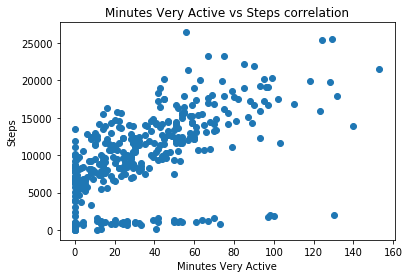

In [53]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Minutes Very Active vs Steps correlation')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

There is a positive correlation between 'Steps' and 'Minutes Very Active', But according to the chart there is some data missing, where either one or the other variable is computed but the other is missing. This is affecting at the correlation value, it feels that without them it would have a stronger value.

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [68]:
fitbit['Minutes Sedentary'] = fitbit['Minutes Sedentary'].astype(float)
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

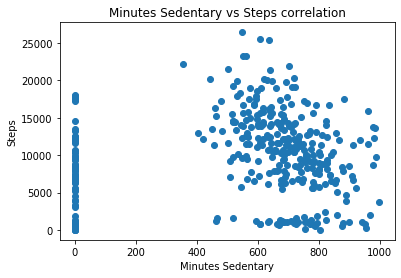

In [69]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Minutes Sedentary vs Steps correlation')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
There is no correlation between Minutes Sedentary and Steps.
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [70]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

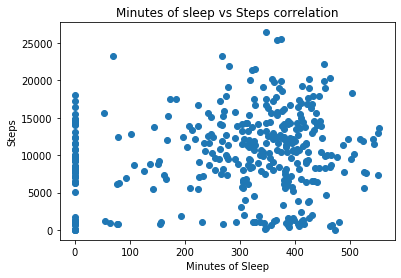

In [71]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Minutes of sleep vs Steps correlation')
plt.xlabel('Minutes of Sleep')
plt.ylabel('Steps')
plt.show()

There is a very light positive correlation between the minutes of Sleep and Steps

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [72]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [81]:
fitbit_ss = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]
cor_fit = fitbit_ss.corr()
cor_fit.sort_values('Steps',ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

According to the result of the correlation matrix, the highest correlation with the variable 'Steps' is Minutes Very Active. Floors and Calorie Burn also have a slight positive correlation. But as we saw above either MinutesOfSleep and Minutes Sedentary are relevant enough. All of them have positive correlation.

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [102]:
conn_string = 'mysql+pymysql://root:&FK^[8jLK$"/4=n*@34.65.10.136:3306/time_grades'
conn = sqlalchemy.create_engine(conn_string)
time_grades = pd.read_sql_query('SELECT * FROM time_grades;', conn)
time_grades = time_grades.replace(r'\r',' ', regex=True) 
time_grades.dtypes

Name          object
Study time     int64
Grade         object
dtype: object

#### Show visually the frequency distribution of the `time_grades` dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028ACB67AF98>]],
      dtype=object)

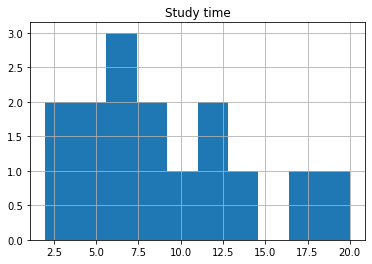

In [97]:
time_grades.hist()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [110]:
time_grades['Grade'] = time_grades['Grade'].astype(float)
pear_corr = time_grades['Study time'].corr(time_grades['Grade'])
spear_corr = time_grades['Study time'].corr(time_grades['Grade'],method='spearman')
print(f'The Pearson Correlation is {pear_corr}')
print(f'The Spearman Correlation is {spear_corr}')

The Pearson Correlation is 0.7980456073578858
The Spearman Correlation is 0.819658753036942


Both correlation measures agree on the fact that there is a high correlation between the time studied and the grade.


#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

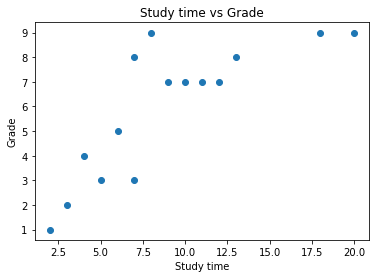

In [111]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.title('Study time vs Grade')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

The plot shows visually how the time studied does affect to the final grade.

#### Could you explain the difference between Pearson and Spearman correlations?

The Pearson correlation evaluates the linear relationship between two continuous variables. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. 
On one side, you might use a Pearson correlation to evaluate whether increases in temperature at your production facility are associated with decreasing thickness of your chocolate coating.
On the other side, you might use Spearman correlation to evaluate whether the order in which employees complete a test exercise is related to the number of months they have been employed.